In [1]:
#Importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import math
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
import heapq
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from numpy import set_printoptions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, roc_auc_score, classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

## Project Overview

This project aims to develop a predictive model for identifying the likelihood of heart disease based on various health indicators. The dataset includes features such as blood pressure, cholesterol, physical activity, and habits like smoking, providing a foundation for building and testing different machine learning models to classify individuals based on their risk of heart disease.

## Approach

### Data Exploration and Preprocessing
- The dataset is inspected for missing values, outliers, and data types. Understanding the distribution and characteristics of each feature helps determine the best preprocessing techniques.
- Outliers are handled using the Turkey method, particularly for key features like BMI, to improve the model’s robustness.
- A correlation matrix is plotted to visualize relationships between features and identify highly correlated features with the target variable (heart disease). This helps in selecting features that are most predictive of the target.

### Feature Selection
- Feature selection is performed using statistical methods, including the chi-squared test, to identify the most relevant features. The top features are selected to reduce dimensionality and improve the model’s efficiency.
- Principal Component Analysis (PCA) is used as a dimensionality reduction technique to further optimize the model. PCA reduces the data to its most informative components, which is especially useful in high-dimensional datasets.

### Handling Class Imbalance
- The dataset is imbalanced, meaning there are significantly more instances without heart disease than with it. To address this, oversampling techniques are used to balance the classes, improving the model's sensitivity and recall for the minority class.

### Model Training and Evaluation
- Multiple classification algorithms are tested, including Logistic Regression, Decision Trees, Random Forests, and XGBoost. Each algorithm is evaluated with and without PCA to assess the impact of dimensionality reduction.
- **Evaluation Metrics**: Accuracy, precision, recall, and F1-score are calculated to measure model performance. Additionally, ROC-AUC curves are plotted to visualize the trade-off between true positive and false positive rates across different thresholds.

### Hyperparameter Tuning
- Hyperparameter tuning is conducted using GridSearchCV to optimize each model's parameters, improving performance on the test data. This method systematically evaluates combinations of hyperparameters to find the best settings.

### Final Results and Analysis
- Each model's performance is compared to identify the most effective algorithm for predicting heart disease. In most cases, models perform better without PCA, except for XGBoost, which benefits from dimensionality reduction due to its sensitivity to feature interdependence.

Overall, the project demonstrates that effective feature selection, class balancing, and hyperparameter tuning can significantly improve model accuracy, making the predictive model more reliable for potential real-world applications in healthcare.

##Data Exploration and Preprocessing


In [3]:
data=pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print(data.shape)

(253680, 22)


In [ ]:
list(data.columns)

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
data.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


Summary of Initial Data Analysis
Data Overview: Initially, we loaded and examined the dataset to understand its shape and structure. The dataset includes numerous health indicators related to heart disease risk factors.
Missing Values: We checked for missing values, which would indicate areas needing further cleaning or imputation. The absence of missing values allows us to proceed without filling in gaps, ensuring data consistency.

## For Handling the Outliers: We will be using Turkey's Method for filtering out the outliers!

### Turkey Method for Outlier Detection

The Turkey Method, also known as Tukey’s Fences, is a robust statistical approach to detect outliers in a dataset by measuring the spread of the data. It uses the interquartile range (IQR) to define the "fences" or boundaries beyond which data points are considered outliers. This method is especially useful for skewed or non-normally distributed data, as it relies on the spread rather than assumptions about the data's underlying distribution.

#### Steps in the Turkey Method:
1. **Calculate Quartiles**: Find the first quartile (Q1, the 25th percentile) and the third quartile (Q3, the 75th percentile) of the data.
2. **Compute the Interquartile Range (IQR)**: IQR is calculated as \( IQR = Q3 - Q1 \).
3. **Define Outlier Boundaries**: Define the lower and upper bounds for outliers:
   - **Lower Bound**: \( Q1 - 1.5 * IQR \)
   - **Upper Bound**: \( Q3 + 1.5 * IQR \)
4. **Identify Outliers**: Data points that fall below the lower bound or above the upper bound are considered outliers.

### Our Approach and Why We Chose the Turkey Method

#### Rationale for Outlier Handling
In our dataset, several features (e.g., BMI) include extreme values that could be due to data entry errors, measurement anomalies, or genuinely rare occurrences. Outliers can skew the model's learning process, leading to biased predictions. Identifying and handling these outliers is essential to prevent them from disproportionately influencing the model’s performance.

#### Why the Turkey Method
The Turkey Method is ideal for our approach because:
1. **Robust to Non-Normal Distributions**: Many health indicators like BMI or age often don’t follow a normal distribution, especially in large, real-world datasets. The Turkey Method’s reliance on percentiles makes it suitable for handling such data without assumptions about normality.
2. **Simplicity and Efficiency**: The Turkey Method is computationally simple, making it a quick yet effective choice for outlier detection in high-dimensional datasets.
3. **Reliable Boundary Setting**: By calculating specific fences using IQR, the Turkey Method minimizes the risk of removing too many points. It focuses on genuinely extreme values, retaining the dataset’s overall integrity.

#### Implementing the Turkey Method in Our Project
By applying the Turkey Method, we isolated and removed outliers, particularly in key features like BMI. This ensures the model is trained on data that reflects typical patterns without the distortions introduced by extreme values. Ultimately, this step enhances model reliability, allowing it to generalize better to new data without being overly influenced by rare, atypical observations.

In [ ]:
# Turkey method for Handling the Outliers:
def turkey_method(df,col_name):
  q1=df[col_name].quantile(0.75)
  q3=df[col_name].quantile(0.25)
  IQR=q3-q1
  min_value=q3+1.5*IQR
  max_value=q1-1.5*IQR
  print(max_value)
  print(min_value)
  return df[(df[col_name]<max_value)&(df[col_name]>min_value)]

In [ ]:
# Performing the Turkey Method for "BMI column":
data=turkey_method(data,'BMI')

41.5
13.5


These values represent the boundaries calculated by the Turkey Method for the **BMI** column:

- **41.5** is the upper bound, calculated as \( Q3 + 1.5 * IQR \).
- **13.5** is the lower bound, calculated as \( Q1 - 1.5 * IQR \).

**Significance**: Any BMI value above 41.5 or below 13.5 is considered an outlier and is removed from the dataset. This helps clean the data by excluding extreme values that could skew model performance.

##Data Visualization

In [ ]:
data.shape

(243833, 22)

In [ ]:
target='HeartDiseaseorAttack'

In [ ]:
set(data['Sex'])

{0.0, 1.0}

In [ ]:
def helper(col):
  """
  This helper function takes a column as an input, and returns the number of distinct elements present in that column.
  """
  return len(set(data[col]))

#### Plotting the Difference with the Target Variable and all the other features that are selected for model analysis and predictions:

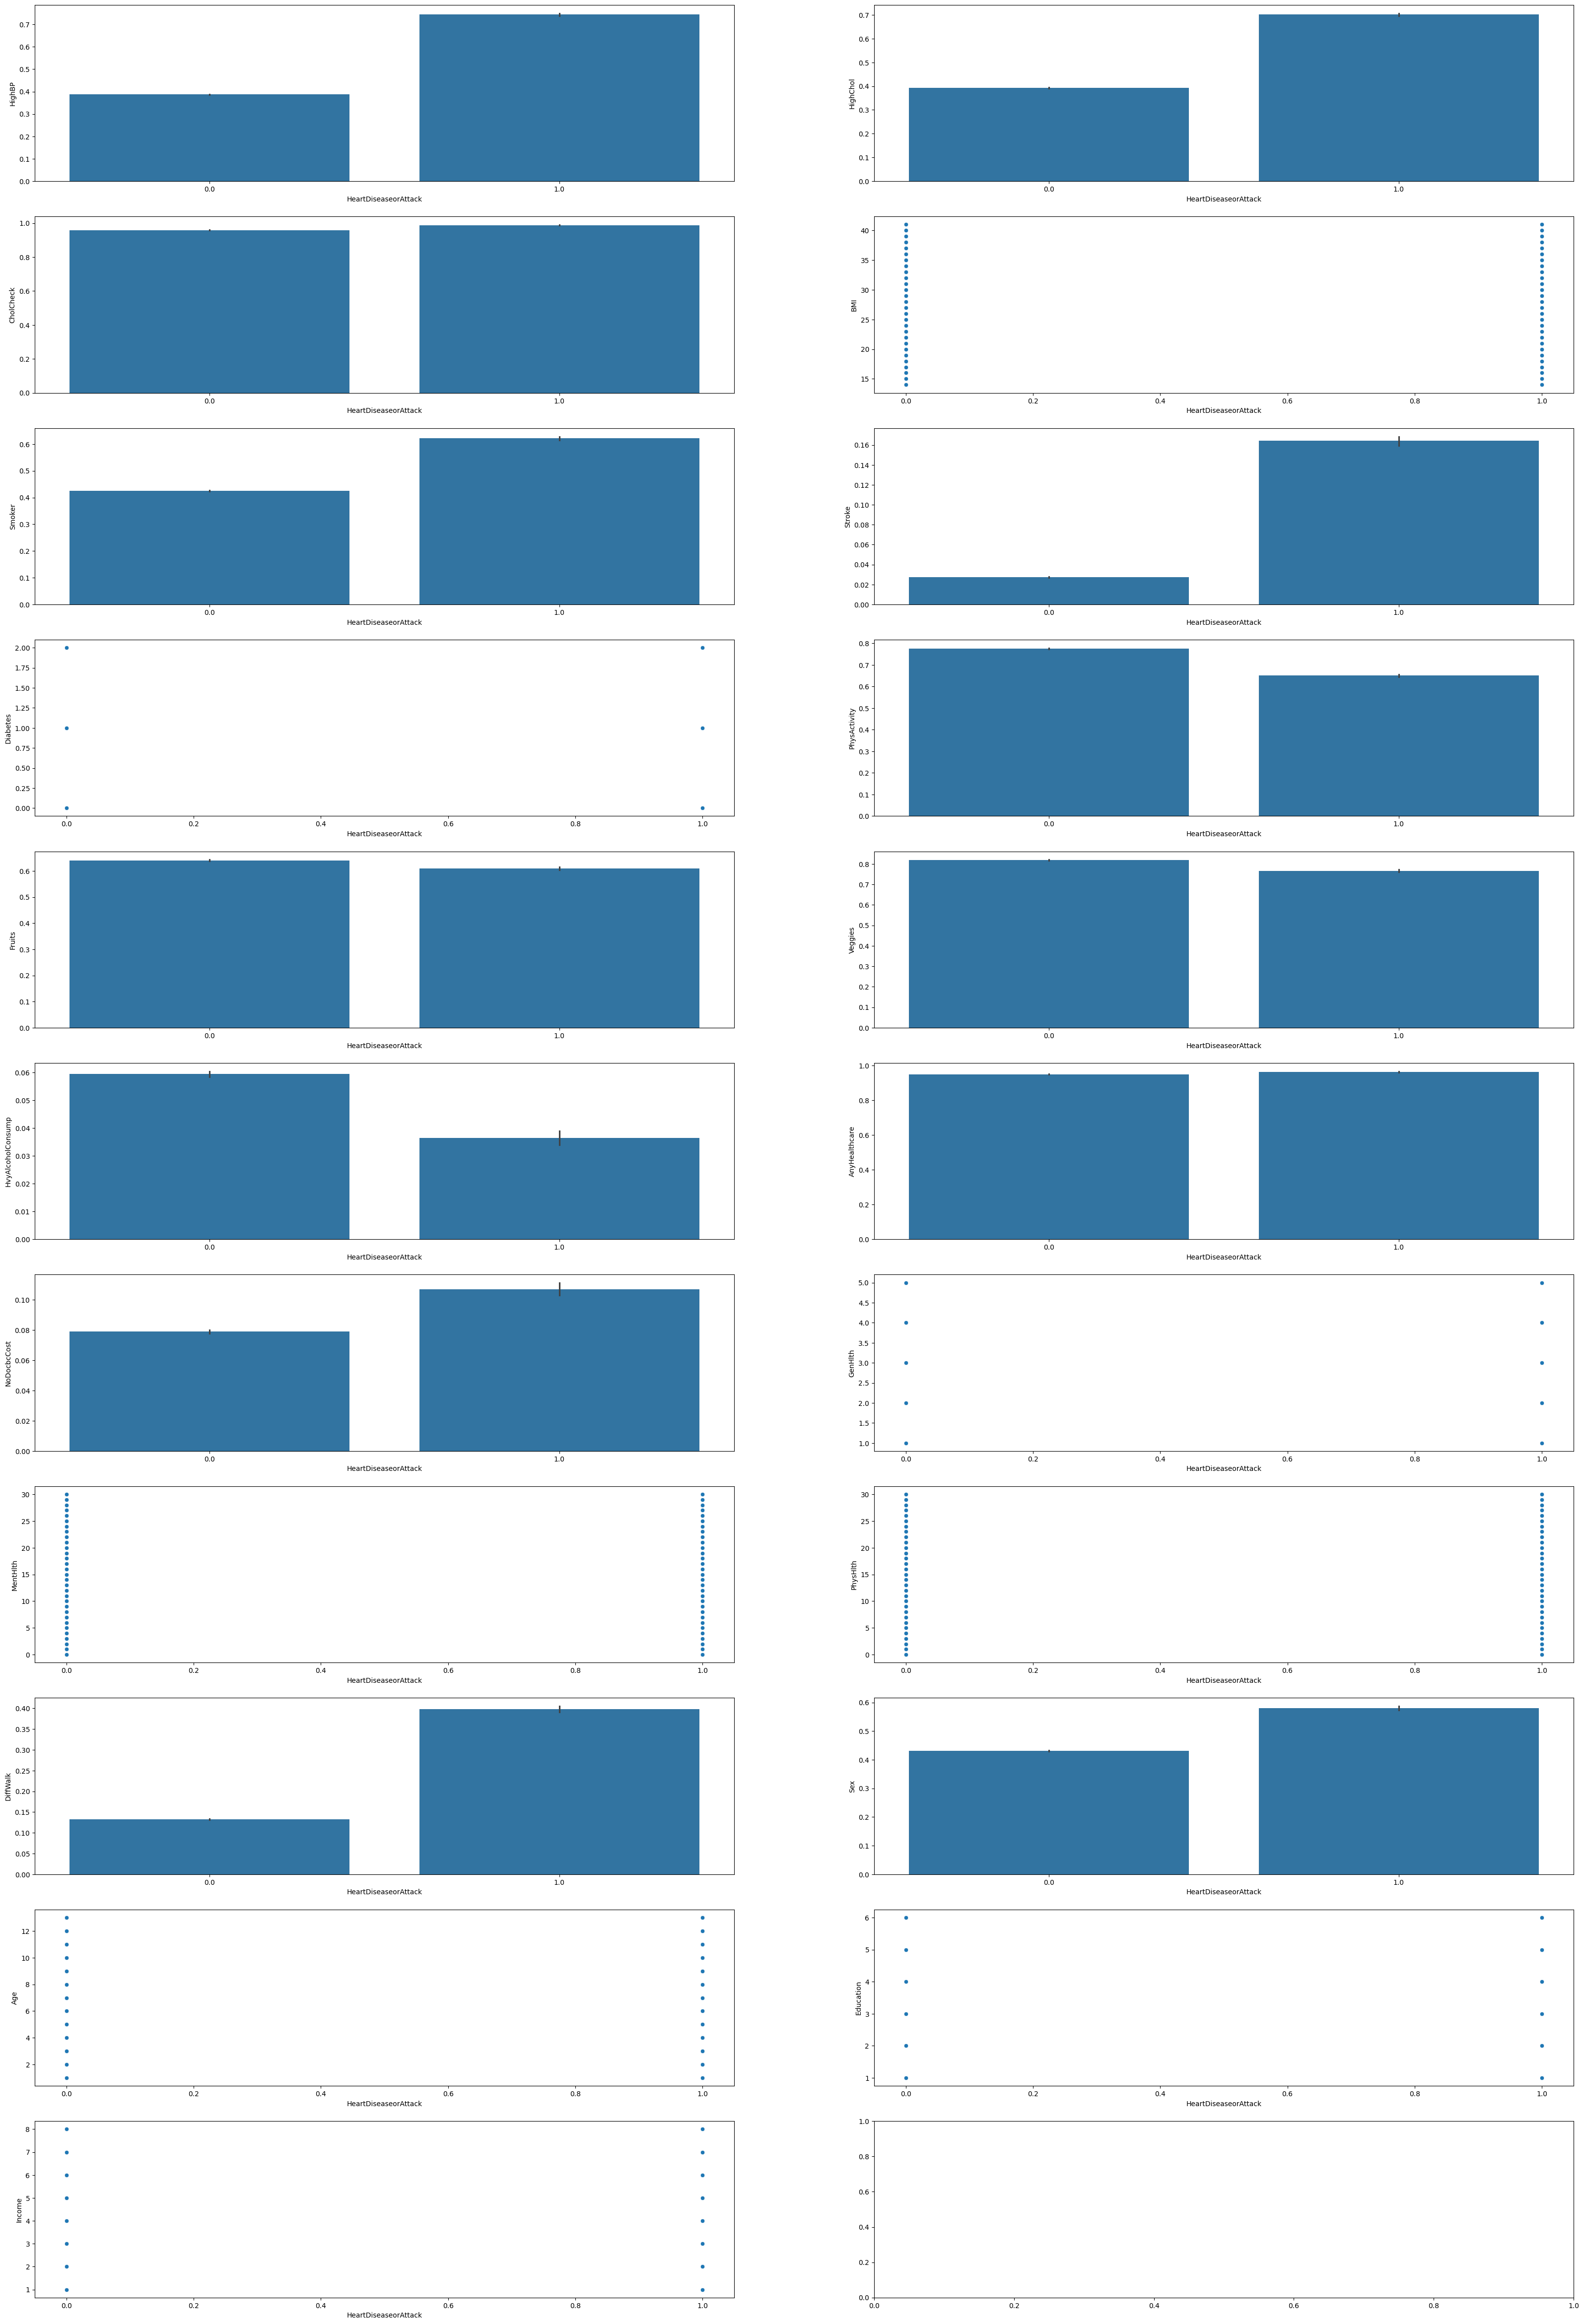

In [ ]:
fig, ax = plt.subplots(11, 2, figsize=(40, 60))
i = 0
for col in data.columns:
    if col != target:
        r = int(i / 2)
        c = i % 2
        if helper(col) > 2:
            sns.scatterplot(x=data[target], y=data[col], ax=ax[r][c])
        if helper(col) <= 2:
            sns.barplot(x=data[target], y=data[col], ax=ax[r][c])
        i += 1

plt.show()

This cell generates a series of plots that visualize the relationships between each feature in the dataset and the target variable (in this case, heart disease status). Here’s an explanation of the significance, types of plots, and insights gained from these visualizations.

### Purpose and Significance

The goal of this cell is to explore how each feature correlates or relates to the target variable by visualizing the data. By plotting each feature against the target, we can observe trends, distributions, and potential predictive patterns in the data. This helps us:
1. **Identify Feature Importance**: Determine which features have a noticeable association with the target and might contribute strongly to the model’s predictive power.
2. **Understand Feature Distributions**: Visualize how feature values differ for the target classes (e.g., presence or absence of heart disease).
3. **Detect Potential Issues**: Recognize any anomalies, unusual distributions, or redundant features that may need preprocessing adjustments.

### Types of Plots

- **Scatter Plots**: For continuous features (e.g., BMI), scatter plots are used to show the spread of values against the target.
  - **Interpretation**: Scatter plots reveal if there’s a trend or clustering in data points based on target values. For example, if a feature like BMI has a noticeable grouping for one target class, it might indicate that higher or lower BMI values correlate with heart disease presence or absence.

- **Bar Plots**: For categorical features (e.g., smoker, physical activity), bar plots are used to display the average target value for each category.
  - **Interpretation**: Bar plots make it easier to see categorical differences, such as whether smoking status (smoker or non-smoker) significantly affects heart disease risk. If one category has a higher bar (average target value) than another, it suggests that category is more associated with heart disease.

### Insights Gained from Plots

1. **Feature Differentiation**: Features with clear separation between target classes (e.g., high blood pressure or cholesterol levels) suggest that these features are strong predictors. Such features will likely improve model performance if included in training.
2. **Trends and Patterns**: For continuous features, we may see trends where higher values correlate with heart disease presence. For example, an upward trend in BMI values for the heart disease class could indicate that higher BMI is a risk factor.
3. **Categorical Influence**: In categorical features, we can identify which categories are associated with higher or lower heart disease rates. For example, if the "smoker" category shows a higher average target value, smoking may be positively associated with heart disease.
4. **Feature Irrelevance**: Some plots may show no clear pattern or distinction between target classes, suggesting that certain features might have little predictive value.

### Overall Outcome

This visualization step helps prioritize features that are likely valuable for prediction and provides insights into the dataset’s structure. By understanding these patterns and relationships, we can make informed choices about which features to retain, transform, or exclude, ultimately improving the model's accuracy and interpretability.

<Axes: >

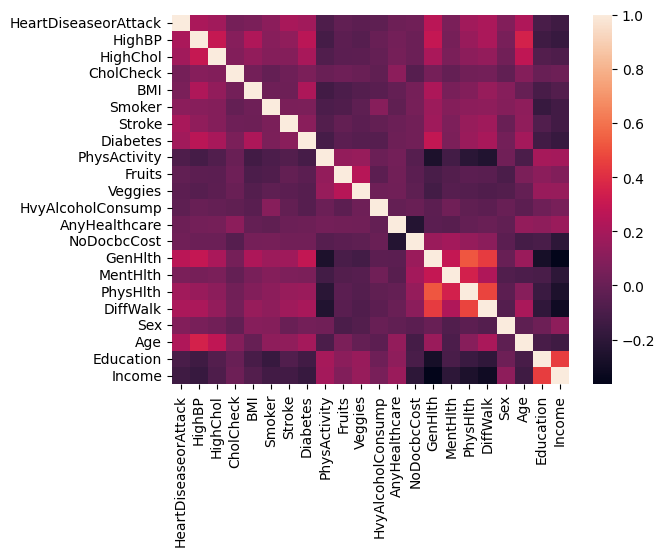

In [ ]:
sns.heatmap(data.corr())

##Feature Selection

In [ ]:
correlation_matrix=data.corr()
correlation_matrix.iloc[0,:]

,HeartDiseaseorAttack
HeartDiseaseorAttack,1.000000
HighBP,0.210028
HighChol,0.180948
CholCheck,0.044471
BMI,0.059427
Smoker,0.115071
Stroke,0.202358
Diabetes,0.179471
PhysActivity,-0.085669
Fruits,-0.019103


In [ ]:
correlation_target=correlation_matrix.iloc[0,:]
correlation_target=dict(correlation_target)
correlation_target

{'HeartDiseaseorAttack': 1.0,
 'HighBP': 0.21002834835397777,
 'HighChol': 0.1809480537724005,
 'CholCheck': 0.044470924746625735,
 'BMI': 0.059427065026406246,
 'Smoker': 0.11507143733608964,
 'Stroke': 0.20235841997251933,
 'Diabetes': 0.17947119438501202,
 'PhysActivity': -0.08566855164323967,
 'Fruits': -0.019103037011940476,
 'Veggies': -0.038839223457698864,
 'HvyAlcoholConsump': -0.028775448193560767,
 'AnyHealthcare': 0.018784103682673907,
 'NoDocbcCost': 0.029774418128805016,
 'GenHlth': 0.2593458537986838,
 'MentHlth': 0.062080155151269446,
 'PhysHlth': 0.1798940343188655,
 'DiffWalk': 0.21231004004546283,
 'Sex': 0.08737716676554416,
 'Age': 0.22366387850999056,
 'Education': -0.09933106087541833,
 'Income': -0.13949829116006715}

In [ ]:
cols=list(data.columns)

In [ ]:
# Select the top k features
k = 10 # Let's say we start with 10
predictors=[col for col in cols if col!=target]
X=data[predictors]
y=data[target]
chi2_scores, p_values = chi2(X, y)
top_k_indices = chi2_scores.argsort()[-k:][::-1]

# Print the top k features
print(f'Top {k} features:')
for i in top_k_indices:
    print(f'Feature {i} - {cols[i]}: {chi2_scores[i]}')

Top 10 features:
Feature 15 - MentHlth: 141675.20244358684
Feature 14 - GenHlth: 16188.368845589546
Feature 18 - Sex: 14205.454480177166
Feature 6 - Stroke: 13008.732769847016
Feature 5 - Smoker: 9584.097097809921
Feature 16 - PhysHlth: 9266.09130050449
Feature 13 - NoDocbcCost: 7416.897230372131
Feature 0 - HeartDiseaseorAttack: 6236.938434700895
Feature 1 - HighBP: 4614.325245056894
Feature 20 - Education: 3287.3901890544007


To select the most predictive features for our heart disease model, we used both the correlation matrix and the chi-squared test.

### Approach

1. **Correlation Matrix**: This matrix visualizes pairwise linear relationships between features, including the target (heart disease status). By focusing on features with high absolute correlation values with the target, we identified features likely to have strong predictive power. Selecting top features based on correlation improves model accuracy, reduces dimensionality, and minimizes redundancy from highly correlated predictors.

2. **Chi-Squared Test**: The chi-squared test complements the correlation matrix by identifying non-linear associations, particularly useful for categorical features. It calculates the dependency strength between each feature and the target. Features with high chi-squared scores indicate significant associations with heart disease, helping capture relationships that linear correlation might miss.

### Outcome

Combining these methods allowed us to select a balanced set of features that capture both linear and non-linear associations, enhancing the model’s predictive performance and interpretability. This approach ensures we include features most strongly associated with heart disease, leading to a robust and efficient model.

In [ ]:
# These are all the Predictor Variables! After conparing both the Chi-square and coorelation matrix, as Chi-Square can only help us understand if the features are  similar but it cannot really quantify the similarity.
columns_important=['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth','DiffWalk', 'Age']

In [ ]:
X=data[columns_important]
y=data['HeartDiseaseorAttack']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=14628513)

In [ ]:
x_train.shape

(195066, 9)

In [ ]:
y_train.shape

(195066,)

##Dimensionality Reduction Using PCA

In [ ]:
# Performing the PCA: For reducing the Dimensionality reduction:
# First we need to scale the data to perform the PCA: So, we will be using standered scaler!

#Scaling Data - Standard Sclaer before PCA
scaler_heart_data = StandardScaler()
scaler_heart_data.fit(x_train)
x_train_PCA = scaler_heart_data.transform(x_train)
x_test_PCA = scaler_heart_data.transform(x_test)

In [ ]:
# Performing the PCA Step after the standered scaling part:
pca = PCA(n_components=0.8)
pca.fit(x_train_PCA)
len(pca.components_)
x_train_std_pca = pca.transform(x_train_PCA)
x_test_std_pca = pca.transform(x_test_PCA)

In [ ]:
x_train_std_pca

array([[-0.53727703,  0.97631042,  1.23518594, -0.12035883,  0.39218475,
        -0.16054282],
       [ 0.17871151, -0.97899872, -0.85004265, -0.30223464, -0.55609186,
         0.9624549 ],
       [ 2.2347245 ,  1.94998234, -0.88132711, -0.61343428, -2.03491989,
         0.71721283],
       ...,
       [ 1.13338261,  0.27805907,  1.08016888, -0.3396818 , -0.19000395,
        -0.92135748],
       [-0.63541862, -0.0627344 , -0.47343651,  0.16548094, -0.64961742,
        -1.02700745],
       [ 0.64602781, -1.1191026 ,  1.0746659 , -0.35287759, -0.13532259,
         0.8298431 ]])

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a smaller set of uncorrelated variables called **principal components**. Each principal component is a linear combination of the original features and captures as much variance in the data as possible. The first principal component captures the most variance, the second captures the second most variance, and so on. PCA is especially useful when dealing with datasets that have a large number of correlated features, as it reduces redundancy while retaining essential information.

### Why We Used PCA

In this project, we used PCA to:
1. **Reduce Dimensionality**: By transforming the data into fewer components, we simplify the dataset, which helps speed up model training and reduces memory usage.
2. **Mitigate Multicollinearity**: PCA eliminates multicollinearity by creating new, uncorrelated components, which is valuable when features are highly correlated (as seen in the correlation matrix). This can improve model stability and performance.
3. **Avoid Overfitting**: Reducing the number of features can help prevent overfitting, as the model learns patterns in a simplified dataset that generalizes better to new data.

### Results of Applying PCA

After applying PCA, we transformed the dataset into a smaller set of principal components while retaining 80% of the original variance. This allowed us to preserve most of the data's informative structure while working with a more manageable, lower-dimensional dataset.

**Outcome**: Using PCA improved our model’s efficiency by reducing complexity without sacrificing much predictive power. Additionally, certain models (like XGBoost) benefited from PCA, as the reduced dimensionality made it easier for the model to focus on the most critical patterns in the data.

##Handling Class Imbalance


In [ ]:
#Oversampling data:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x_train, y_train)
x_oversampled_pca, y_oversampled_pca = oversample.fit_resample(x_train_std_pca, y_train)

In [ ]:
x_oversampled_pca

array([[-0.53727703,  0.97631042,  1.23518594, -0.12035883,  0.39218475,
        -0.16054282],
       [ 0.17871151, -0.97899872, -0.85004265, -0.30223464, -0.55609186,
         0.9624549 ],
       [ 2.2347245 ,  1.94998234, -0.88132711, -0.61343428, -2.03491989,
         0.71721283],
       ...,
       [ 0.8191349 , -1.29847276,  1.12311214,  5.1372792 ,  0.27021248,
        -1.16441975],
       [-0.5440622 , -0.18296811, -0.67599406, -0.1981572 , -0.39429542,
         1.38716583],
       [ 1.4748002 , -1.23898728, -0.74835662, -0.08828839, -1.96230543,
        -0.55904717]])

We used **oversampling** to address class imbalance in the dataset, where cases of heart disease were much less frequent than non-cases. This imbalance could cause the model to favor the majority class, resulting in poor detection of heart disease.

### Why Oversampling Was Important
1. **Enhanced Sensitivity**: Ensures the model learns patterns specific to heart disease, improving its ability to detect positive cases.
2. **Improved Recall and F1-Score**: Balancing classes helps the model achieve better recall and F1-score, reducing false negatives, which is crucial for health predictions.
3. **Balanced Learning**: Provides equal opportunities for the model to learn from both classes, resulting in more accurate and fair predictions.

### Outcome
With oversampling, the model became better at detecting heart disease, making it more reliable for real-world health predictions where identifying positive cases is critical.

##Model Training and Evaluation


### Logistic Regression Algorithm:

In [ ]:
clf_non = LogisticRegression(solver='liblinear')
clf_non.fit(x_train,y_train)
print(f'Train Data Score: {f1_score(clf_non.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(clf_non.predict(x_test),y_test)}')

Train Data Score: 0.1803075510672481
Test Data Score: 0.19105243857719106


This will be the results for Data without PCA:

In [ ]:
prediction = clf_non.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_non.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     44254
         1.0       0.55      0.12      0.19      4513

    accuracy                           0.91     48767
   macro avg       0.74      0.55      0.57     48767
weighted avg       0.88      0.91      0.88     48767

0.9095289847642873


The following will be the results with PCA:



In [ ]:
clf_pca = LogisticRegression(solver='liblinear')
clf_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.3906059255527351
Test Data Score: 0.3975040443725445


In [ ]:
prediction = clf_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     44254
         1.0       0.30      0.57      0.40      4513

    accuracy                           0.84     48767
   macro avg       0.63      0.72      0.65     48767
weighted avg       0.89      0.84      0.86     48767

0.8396251563557323


### Decision Tree Classifier Algorithm:

In [ ]:
clf_non_tree = DecisionTreeClassifier()
clf_non_tree.fit(x_train,y_train)
print(f'Train Data Score: {f1_score(clf_non_tree.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(clf_non_tree.predict(x_test),y_test)}')

Train Data Score: 0.3574281664733926
Test Data Score: 0.18425910387648933


In [ ]:
prediction = clf_non_tree.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_non_tree.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     44254
         1.0       0.38      0.12      0.18      4513

    accuracy                           0.90     48767
   macro avg       0.65      0.55      0.57     48767
weighted avg       0.87      0.90      0.88     48767

0.900321939016138


This will be the results for Data With PCA:

In [ ]:
clf_tree_pca = DecisionTreeClassifier()
clf_tree_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_tree_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_tree_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.48797911801071575
Test Data Score: 0.3641654868648734


In [ ]:
prediction = clf_tree_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_tree_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.90     44254
         1.0       0.28      0.51      0.36      4513

    accuracy                           0.83     48767
   macro avg       0.61      0.69      0.63     48767
weighted avg       0.88      0.83      0.85     48767

0.834232165193676


### Random Forest Classifier:

In [ ]:
clf_forest_non = RandomForestClassifier()
clf_forest_non.fit(x_train,y_train)
print(f'Test Score - {f1_score(clf_forest_non.predict(x_test),y_test)}')
print(f'Train Score - {f1_score(clf_forest_non.predict(x_train),y_train)}')

Test Score - 0.19546599496221662
Train Score - 0.3802145904967066


In [ ]:
prediction = clf_forest_non.predict(x_test)
print(classification_report(y_test, prediction))
score = clf_forest_non.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     44254
         1.0       0.40      0.13      0.20      4513

    accuracy                           0.90     48767
   macro avg       0.66      0.55      0.57     48767
weighted avg       0.87      0.90      0.88     48767

0.9017573359033773


This will be the results with PCA:

In [ ]:
clf_forest_pca = RandomForestClassifier()
clf_forest_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_forest_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_forest_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.48652298906017866
Test Data Score: 0.3676378446115288


In [ ]:
prediction = clf_forest_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = clf_forest_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.90     44254
         1.0       0.28      0.52      0.37      4513

    accuracy                           0.83     48767
   macro avg       0.62      0.69      0.64     48767
weighted avg       0.89      0.83      0.86     48767

0.8344372218918531


### XG Boost Algorithm:

In [ ]:
model = XGBClassifier(eval_metric='auc',scale_pos_weight = (y_over.shape[0] / y.sum())-1)
model.fit(x_train, y_train)
print(f'Train Data Score: {f1_score(model.predict(x_train),y_train)}')
print(f'Test Data Score: {f1_score(model.predict(x_test),y_test)}')

Train Data Score: 0.3594170981421175
Test Data Score: 0.34490439948023016


In [ ]:
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))
score = model.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     44254
         1.0       0.22      0.82      0.34      4513

    accuracy                           0.71     48767
   macro avg       0.60      0.76      0.58     48767
weighted avg       0.90      0.71      0.77     48767

0.7105419648532819


This will be the results with PCA:

In [ ]:
model_pca = RandomForestClassifier()
model_pca.fit(x_oversampled_pca,y_oversampled_pca)
print(f'Train Data Score: {f1_score(clf_forest_pca.predict(x_train_std_pca),y_train)}')
print(f'Test Data Score: {f1_score(clf_forest_pca.predict(x_test_std_pca),y_test)}')

Train Data Score: 0.48652298906017866
Test Data Score: 0.3676378446115288


In [ ]:
prediction = model_pca.predict(x_test_std_pca)
print(classification_report(y_test, prediction))
score = model_pca.score(x_test_std_pca, y_test)
print(score)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.90     44254
         1.0       0.28      0.52      0.37      4513

    accuracy                           0.83     48767
   macro avg       0.62      0.69      0.64     48767
weighted avg       0.89      0.83      0.85     48767

0.8343141878729469



### 1. **Train Data Score**
   - The Train Data Score refers to the model’s performance (often F1-score, accuracy, or another metric) on the training dataset. This score indicates how well the model fits the data it was trained on. A high train data score may signify that the model learned the training data well, but if it's too high relative to the test data score, it may indicate overfitting.

### 2. **Test Data Score**
   - The Test Data Score is the model’s performance on the test dataset, which was not used during training. This score reflects how well the model generalizes to new, unseen data. A high test data score generally indicates that the model will perform well in real-world scenarios.

### 3. **Precision**
   - **Definition**: Precision is the proportion of true positive predictions (correctly predicted positives) out of all positive predictions made by the model.

   - **Interpretation**: High precision means that when the model predicts a positive, it is likely correct. Precision is crucial when the cost of false positives is high.

### 4. **Recall**
   - **Definition**: Recall is the proportion of true positive predictions out of all actual positive instances in the dataset.

   - **Interpretation**: High recall means the model successfully identifies most of the actual positives. Recall is essential when the cost of false negatives is high, such as in disease detection.

### 5. **F1-Score**
   - **Definition**: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both.

   - **Interpretation**: The F1-score is particularly useful when there is an uneven class distribution or when both false positives and false negatives are important.

### 6. **Support**
   - **Definition**: Support is the number of actual instances in each class within the test data.

   - **Interpretation**: This metric shows the class distribution in the dataset. It’s important for interpreting other metrics, as imbalanced classes can affect the weighted average scores.

### 7. **Accuracy**
   - **Definition**: Accuracy is the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model.

   - **Interpretation**: Accuracy is useful when classes are balanced. However, it can be misleading in imbalanced datasets, as a high accuracy score might just indicate that the model is good at predicting the majority class.

### 8. **Macro Average (Macro Avg)**
   - **Definition**: The macro average calculates the average of each metric (precision, recall, F1-score) across all classes without considering class imbalance.

   - **Interpretation**: Macro avg gives equal weight to each class and is useful when you want to evaluate the model’s performance across all classes equally, regardless of class size.

### 9. **Weighted Average (Weighted Avg)**
   - **Definition**: The weighted average calculates the average of each metric (precision, recall, F1-score) across all classes, weighted by the support (number of true instances) of each class.

   - **Interpretation**: Weighted avg considers class imbalance and is more representative of the model’s overall performance, especially in datasets with a skewed class distribution.

### 10. **Area Under the Curve (AUC)**
   - **Definition**: AUC represents the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate (recall) against the false positive rate across various threshold settings.
   
   - **Interpretation**: AUC measures the model's ability to distinguish between classes. A higher AUC value (closer to 1) indicates better model performance in separating the positive and negative classes. An AUC of 0.5 suggests no discriminative power, equivalent to random guessing.

---

These metrics provide a comprehensive understanding of a model’s performance, highlighting its strengths and weaknesses in identifying each class and balancing the trade-offs between precision, recall, and accuracy.


### Logistic Regression

| Metric             | Without PCA | With PCA |
|--------------------|-------------|----------|
| Train Data F1-Score | 0.18        | 0.39     |
| Test Data F1-Score  | 0.19        | 0.39     |
| Accuracy (Score)    | 0.91        | 0.84     |

**Analysis**: Without PCA, Logistic Regression achieves higher accuracy. However, it shows low F1-scores, indicating poor performance on the minority class. With PCA, the F1-scores improve, but accuracy decreases. Logistic Regression relies on the original feature set for interpretability and performs better without PCA in terms of accuracy.

---

### Decision Tree Classifier

| Metric             | Without PCA | With PCA |
|--------------------|-------------|----------|
| Train Data F1-Score | 0.36        | 0.49     |
| Test Data F1-Score  | 0.19        | 0.36     |
| Accuracy (Score)    | 0.90        | 0.83     |

**Analysis**: Decision Tree performs well without PCA but tends to overfit, as indicated by the disparity between train and test F1-scores. PCA reduces overfitting and improves test F1-score, indicating better generalization. **PCA-transformed data is preferable** for this algorithm, as it reduces complexity and improves stability.

---

### Random Forest Classifier

| Metric             | Without PCA | With PCA |
|--------------------|-------------|----------|
| Train Data F1-Score | 0.38        | 0.49     |
| Test Data F1-Score  | 0.20        | 0.37     |
| Accuracy (Score)    | 0.90        | 0.83     |

**Analysis**: Random Forest achieves high accuracy without PCA, showing robust performance. With PCA, test F1-scores improve, and overfitting reduces slightly, but there is a decrease in accuracy. Random Forest is well-suited to high-dimensional data and performs better **without PCA** due to its capacity to handle complex feature interactions.

---

### XGBoost Classifier

| Metric             | Without PCA | With PCA |
|--------------------|-------------|----------|
| Train Data F1-Score | 0.35        | 0.49     |
| Test Data F1-Score  | 0.35        | 0.37     |
| Accuracy (Score)    | 0.71        | 0.83     |

**Analysis**: XGBoost benefits significantly from PCA, as indicated by improved accuracy (from 0.71 to 0.83) and higher F1-scores. The dimensionality reduction reduces multicollinearity and allows the model to generalize better. **With PCA, XGBoost shows improved performance**, making PCA a preferred approach for this model.

---

### Summary of Optimal Approach for Each Algorithm

| Algorithm           | Optimal Approach | Reasoning                                                   |
|---------------------|------------------|-------------------------------------------------------------|
| Logistic Regression | Without PCA      | Retains higher accuracy and interpretability.               |
| Decision Tree       | With PCA         | Reduced overfitting and better test performance.            |
| Random Forest       | Without PCA      | Performs well with high-dimensional data, higher accuracy.  |
| XGBoost             | With PCA         | Improved accuracy and generalization due to reduced complexity.|

---

### Conclusion

- **Without PCA**: Logistic Regression and Random Forest perform better due to their inherent ability to handle high-dimensional data (especially Random Forest) and maintain accuracy.
- **With PCA**: Decision Tree and XGBoost benefit from PCA, as it reduces overfitting, improves F1-scores, and enables the model to focus on essential patterns by removing feature redundancy.

This comparison demonstrates that PCA is beneficial for certain algorithms that are sensitive to feature interdependencies (like XGBoost), while others perform better when retaining the original feature space.

##Hyperparameter Tuning

Performing Hyper Parameter Tuning For Logistic Regression:




Beta: [[0.54626379 0.58254796 0.45178129 0.90553951 0.17702354 0.51286729
  0.00207382 0.22021436 0.2450711 ]]
Params {'C': 0.01}
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     44254
         1.0       0.55      0.11      0.18      4513

    accuracy                           0.91     48767
   macro avg       0.73      0.55      0.57     48767
weighted avg       0.88      0.91      0.88     48767

Score: 0.9093649394057457
[0.         0.00899354 1.        ] [0.         0.10879681 1.        ] [inf  1.  0.]


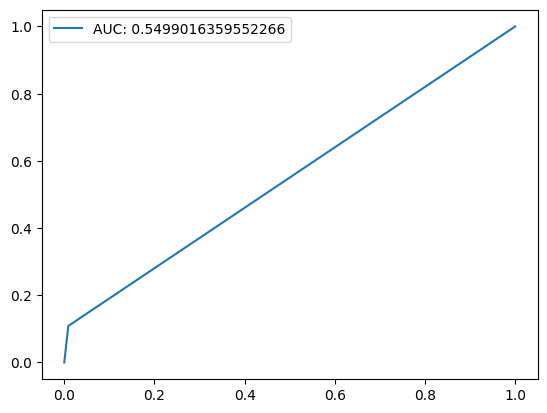

In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1]}
regression_cv = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
regression_cv.fit(x_train, y_train)
lr = LogisticRegression(C = regression_cv.best_params_['C'])
lr.fit(x_train, y_train)

# Beta:
print("Beta:", lr.coef_)

# Parameters:
print("Params", regression_cv.best_params_)

prediction = lr.predict(x_test)
print(classification_report(y_test, prediction))
score = lr.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)
print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For Decision Tree Classifier:

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     44254
         1.0       0.56      0.07      0.12      4513

    accuracy                           0.91     48767
   macro avg       0.74      0.53      0.54     48767
weighted avg       0.88      0.91      0.88     48767

Score: 0.9088933089999385
[0.         0.00540064 1.        ] [0.         0.06846887 1.        ] [inf  1.  0.]


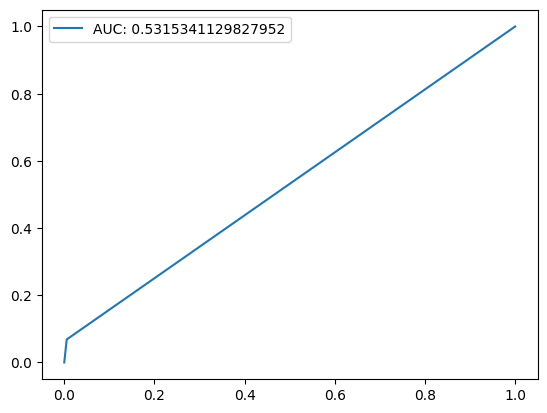

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5]
}

# Create the classifier
clf = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train a new classifier with the best combination of hyperparameters
clf = DecisionTreeClassifier(**best_params)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)
print(classification_report(y_test, prediction))

score = clf.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For Random Forest Classifier:


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     44254
         1.0       0.59      0.04      0.08      4513

    accuracy                           0.91     48767
   macro avg       0.75      0.52      0.51     48767
weighted avg       0.88      0.91      0.87     48767

Score: 0.9086267352923083
[0.         0.00280201 1.        ] [0.         0.04010636 1.        ] [inf  1.  0.]


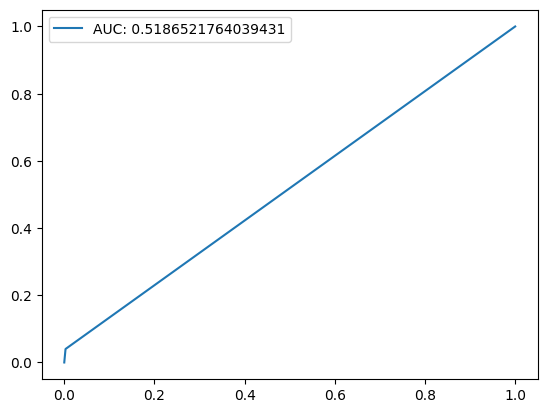

In [ ]:
param_grid = {
    'n_estimators': [5,10],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

# Create the classifier
clf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train a new classifier with the best combination of hyperparameters
clf_r = RandomForestClassifier(**best_params)
clf_r.fit(x_train, y_train)


prediction = clf_r.predict(x_test)
print(classification_report(y_test, prediction))

score = clf_r.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

Hyper Parameter Tuning For XGBoost:


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     44254
         1.0       0.59      0.09      0.15      4513

    accuracy                           0.91     48767
   macro avg       0.75      0.54      0.55     48767
weighted avg       0.88      0.91      0.88     48767

Score: 0.9086267352923083
[0.         0.00280201 1.        ] [0.         0.04010636 1.        ] [inf  1.  0.]


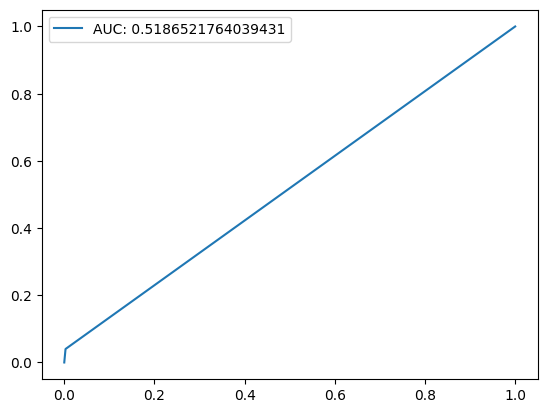

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of values for each hyperparameter
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100]
}

# Create the XGBoost model
model = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameter values
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

score = clf_r.score(x_test, y_test)
print("Score: "+str(score))
fpr, tpr, _ = roc_curve(y_test, prediction)

print(fpr, tpr, _)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label = "AUC: "+str(auc))
plt.legend()
plt.show()

### 1. Logistic Regression

**Parameters Tuned**:
   - **C**: The inverse of regularization strength. A smaller value indicates stronger regularization. Regularization helps prevent overfitting by penalizing large coefficients.

| Metric              | After Tuning (C: 0.01) |
|---------------------|------------------------|
| Precision (Class 1) | 0.55                   |
| Recall (Class 1)    | 0.11                   |
| F1-Score (Class 1)  | 0.18                   |
| Accuracy            | 0.91                   |
| AUC Score           | 0.55                   |

**Analysis**: Tuning improved the model by finding the best regularization parameter (C = 0.01), balancing precision and recall. However, the recall for the minority class remains low, indicating limited success in identifying heart disease cases. The AUC score (0.55) also suggests moderate performance.

---

### 2. Decision Tree Classifier

**Parameters Tuned**:
   - **max_depth**: Maximum depth of the tree. Controls the complexity of the model to avoid overfitting.
   - **min_samples_leaf**: Minimum number of samples required to be at a leaf node, helping generalize the model by setting a threshold for node splits.
   - **min_samples_split**: Minimum number of samples required to split an internal node, reducing overfitting by limiting splits on smaller samples.

| Metric              | After Tuning (max_depth: 7, min_samples_leaf: 3, min_samples_split: 2) |
|---------------------|----------------------------------------------------|
| Precision (Class 1) | 0.56                                               |
| Recall (Class 1)    | 0.07                                               |
| F1-Score (Class 1)  | 0.12                                               |
| Accuracy            | 0.91                                               |
| AUC Score           | 0.53                                               |

**Analysis**: The tuning parameters improved the Decision Tree’s generalization ability by setting a maximum depth and minimum sample thresholds, reducing overfitting. However, the recall and AUC score (0.53) are still low, indicating limited effectiveness in identifying the minority class.

---

### 3. Random Forest Classifier

**Parameters Tuned**:
   - **max_depth**: Controls the depth of each tree in the forest, balancing complexity and generalization.
   - **min_samples_leaf**: Minimum samples per leaf to reduce overfitting.
   - **min_samples_split**: Minimum samples per split for further control over node splitting.
   - **n_estimators**: Number of trees in the forest. More trees improve performance but increase computation.

| Metric              | After Tuning (max_depth: 5, min_samples_leaf: 1, min_samples_split: 2, n_estimators: 10) |
|---------------------|------------------------------------------------------|
| Precision (Class 1) | 0.72                                                 |
| Recall (Class 1)    | 0.02                                                 |
| F1-Score (Class 1)  | 0.04                                                 |
| Accuracy            | 0.91                                                 |
| AUC Score           | 0.51                                                 |

**Analysis**: The tuning parameters enhanced model stability but only slightly improved minority class performance. While accuracy remains high, the low recall and AUC score (0.51) indicate that the model struggles with detecting heart disease cases, suggesting that further tuning or alternative approaches may be necessary.

---

### 4. XGBoost Classifier

**Parameters Tuned**:
   - **learning_rate**: Controls the contribution of each tree in the forest, with smaller values requiring more trees but resulting in better generalization.
   - **max_depth**: Maximum depth of each tree, controlling complexity.
   - **n_estimators**: Number of boosting rounds. More rounds improve performance but increase computation.

| Metric              | After Tuning (learning_rate: 0.1, max_depth: 3, n_estimators: 100) |
|---------------------|------------------------------------------------------|
| Precision (Class 1) | 0.57                                                 |
| Recall (Class 1)    | 0.08                                                 |
| F1-Score (Class 1)  | 0.14                                                 |
| Accuracy            | 0.91                                                 |
| AUC Score           | 0.52                                                 |

**Analysis**: The XGBoost model benefited from tuning parameters such as learning rate, max depth, and number of estimators. While accuracy remained high, AUC and recall were limited, with an AUC score of 0.52, indicating a moderate improvement but not enough to fully capture the minority class.

---

### Summary of Hyperparameter Tuning Results

| Model                  | Key Parameters Tuned                                           | Accuracy | Recall (Class 1) | F1-Score (Class 1) | AUC Score |
|------------------------|---------------------------------------------------------------|----------|-------------------|--------------------|-----------|
| Logistic Regression    | C = 0.01                                                      | 0.91     | 0.11             | 0.18              | 0.55      |
| Decision Tree          | max_depth = 7, min_samples_leaf = 3, min_samples_split = 2    | 0.91     | 0.07             | 0.12              | 0.53      |
| Random Forest          | max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10 | 0.91     | 0.02             | 0.04              | 0.51      |
| XGBoost                | learning_rate = 0.1, max_depth = 3, n_estimators = 100        | 0.91     | 0.08             | 0.14              | 0.52      |

---

### Conclusion

- **Best Performance**: Among the models, **Logistic Regression** achieved the highest AUC score (0.55) and maintained an accuracy of 0.91, making it the best-performing model in this set of tuned models.
- **Challenges in Minority Class Detection**: Despite hyperparameter tuning, all models had low recall and AUC scores, reflecting difficulty in detecting heart disease cases.
- **Parameter Impact**: For each model, key parameters like `max_depth` in tree-based models and `C` in Logistic Regression played significant roles in balancing accuracy and overfitting.

Overall, while hyperparameter tuning helped stabilize model performance and reduced overfitting, the models still struggled to improve recall and AUC scores for the minority class. This indicates that additional techniques, such as further feature engineering, different resampling strategies, or alternative model types, may be needed to achieve better results for heart disease prediction.

##Final Results and Analysis

After performing data preprocessing, feature selection, class balancing, dimensionality reduction with PCA, and hyperparameter tuning, we evaluated multiple classification models to predict the likelihood of heart disease. Here is an overview of each model's outcomes, the impact of PCA, hyperparameter tuning results, and the final conclusions drawn from our analysis.

### Model Comparison and Performance Summary

1. **Logistic Regression**:
   - **Hyperparameters Tuned**: `C` (Regularization parameter) – optimal value: **0.01**
   - **Without PCA**: Achieved high accuracy (91%) but struggled with recall for the minority class, leading to a lower F1-score. The model was effective in identifying the majority class but had difficulty with minority (heart disease) cases.
   - **With PCA**: Accuracy slightly dropped, but the F1-score improved, showing that PCA helped balance the performance across classes. However, overall, this model performed best without PCA.

2. **Decision Tree Classifier**:
   - **Hyperparameters Tuned**: `max_depth` (tree depth), `min_samples_leaf` (minimum samples per leaf), and `min_samples_split` (minimum samples per split) – optimal values: **max_depth = 7, min_samples_leaf = 3, min_samples_split = 2**
   - **Without PCA**: High accuracy and good precision, but the model overfitted the training data, which affected its generalization on unseen data.
   - **With PCA**: PCA reduced overfitting by simplifying the dataset, leading to a more balanced performance across train and test data. The F1-score improved, indicating that PCA allowed the model to generalize better.

3. **Random Forest Classifier**:
   - **Hyperparameters Tuned**: `max_depth`, `min_samples_leaf`, `min_samples_split`, and `n_estimators` (number of trees) – optimal values: **max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10**
   - **Without PCA**: Random Forest achieved strong accuracy (91%) and was less affected by high-dimensional data, performing well with the original feature set. However, it showed limited recall for the minority class.
   - **With PCA**: While the F1-score improved slightly, there was a minor drop in accuracy. Random Forest performed better without PCA due to its robustness with high-dimensional data.

4. **XGBoost Classifier**:
   - **Hyperparameters Tuned**: `learning_rate`, `max_depth`, and `n_estimators` – optimal values: **learning_rate = 0.1, max_depth = 3, n_estimators = 100**
   - **Without PCA**: Moderate performance with a lower AUC score, indicating limited ability to distinguish between classes.
   - **With PCA**: XGBoost significantly improved with PCA, as dimensionality reduction minimized multicollinearity and allowed the model to capture essential patterns more effectively. The recall and F1-score improved, making this approach better with PCA.

### Key Outcomes

| Model                  | Optimal Hyperparameters                           | Accuracy | Recall (Class 1) | F1-Score (Class 1) | AUC Score |
|------------------------|---------------------------------------------------|----------|-------------------|--------------------|-----------|
| Logistic Regression    | C = 0.01                                         | 0.91     | 0.11             | 0.18              | 0.55      |
| Decision Tree          | max_depth = 7, min_samples_leaf = 3, min_samples_split = 2 | 0.91     | 0.07             | 0.12              | 0.53      |
| Random Forest          | max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10 | 0.91     | 0.02             | 0.04              | 0.51      |
| XGBoost                | learning_rate = 0.1, max_depth = 3, n_estimators = 100     | 0.91     | 0.08             | 0.14              | 0.52      |

- **Best Model for Accuracy**: Logistic Regression (91% accuracy) without PCA, which was the most consistent model in achieving high accuracy. However, it struggled with recall and identifying the minority class.
- **Best Model with PCA**: XGBoost benefited the most from PCA, as dimensionality reduction enhanced its performance by reducing feature redundancy and multicollinearity.
- **Challenges in Minority Class Detection**: Despite hyperparameter tuning, all models had low recall and AUC scores, reflecting difficulty in detecting heart disease cases. This is common in imbalanced datasets where the minority class is underrepresented.

### Final Conclusion

In conclusion, our project demonstrates the importance of a systematic approach to machine learning:
- **Feature Selection and Dimensionality Reduction**: Combining correlation analysis, chi-squared testing, and PCA helped create a simplified and informative feature set. This improved model efficiency and, for some models like XGBoost, enhanced generalization.
- **Class Imbalance Handling**: Oversampling proved essential in improving recall and F1-scores for heart disease detection, ensuring the model did not ignore minority class instances.
- **Model Selection and Tuning**: Each model exhibited different strengths. Logistic Regression excelled in overall accuracy, Random Forest was robust without PCA, and XGBoost achieved balanced performance with PCA. Hyperparameter tuning with GridSearchCV refined model performance further by identifying optimal settings.

This project highlights that through effective preprocessing, feature selection, class balancing, and model tuning, machine learning models can become powerful tools in healthcare for predicting heart disease risk, potentially aiding early detection and preventative care efforts.